In [1]:
import numpy as np
from scipy import spatial
import pandas as pd
import time
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv',usecols=[1,2,3])
test=pd.read_csv('test.csv',usecols=[1,2,3])


In [3]:
train.head()

,userId,itemId,rating
0,1290,11,4.0
1,1150,213,4.0
2,851,213,3.5
3,1464,11,4.0
4,812,205,3.5


In [9]:
k_initial = 1
k_test = 141
step = 1

K=[i for i in range(k_initial,k_test,step)]
error=[0 for i in range(k_initial,k_test,step)]
mae=[0 for i in range(k_initial,k_test,step)]
gim=[0 for i in range(k_initial,k_test,step)]
gpim=[0 for i in range(k_initial,k_test,step)]
count_gim=[0 for i in range(k_initial,k_test,step)]
count_gpim=[0 for i in range(k_initial,k_test,step)]

In [10]:
K[-10:]

[131, 132, 133, 134, 135, 136, 137, 138, 139, 140]

In [11]:
t1=time.time()

for index,i in enumerate(test.itertuples(),1):
    predicted=0
    usr=int(i.userId)
    mov=int(i.itemId)
    actual=i.rating
        
    list_A = train[train['itemId']== mov]
    list_mov = train[train['userId']==usr]
    similarity=[]
    corres_rate=[]
    
    for ind2,u in enumerate(list_A.itertuples(),1):
        c1=[]
        c2=[]
        c_user=int(u.userId)
        list_curuser=train[train['userId']==c_user]
        xt=pd.merge(list_mov,list_curuser,how='inner',on=['itemId'])
        c1=xt['rating_x']
        c2=xt['rating_y']
        c1_list=c1.tolist()
        c2_list=c2.tolist()
        sim=0
        if len(c1_list)!=0:
            sim=(1-spatial.distance.cosine(c1_list,c2_list))
        
        similarity.append(sim)
        corres_rate.append(u.rating)
        
    corres_rate = [x for _,x in sorted(zip(similarity,corres_rate),reverse=True)]
    similarity.sort(reverse=True)
   
    #for k in K:
    cs=0
    numc=0
    for k in K:
        k = k - k_initial+1
        if (k-1)>=len(similarity):
            for m in range(k,k_test):
                error[m-1]+=((actual-predicted)**2)
                mae[m-1]+=(abs(actual-predicted))
                if predicted >3:
                    gpim[m-1]+=(abs(actual-predicted))
                    count_gpim[m-1]+=1
                if actual >3:
                    gim[m-1]+=(abs(actual-predicted))
                    count_gim[m-1]+=1
            break
            
        cs+=similarity[k-1]
        numc+=(similarity[k-1]*corres_rate[k-1])
       
        if cs!=0:
            predicted=numc/cs
        error[k-1]+=((actual-predicted)**2)
        mae[k-1]+=(abs(actual-predicted))
        if predicted >3:
            gpim[k-1]+=(abs(actual-predicted))
            count_gpim[k-1]+=1
        if actual >3:
            gim[k-1]+=(abs(actual-predicted))
            count_gim[k-1]+=1
        
    
t2=time.time()        

In [12]:
print (t2-t1)

97687.3993806839


In [13]:
index

6584

In [14]:
error2 = [math.sqrt(i/index) for i in error]
mae2 = [i/index for i in mae]
gim2 = [i/j for i,j in zip(gim,count_gim)]
gpim2 = [i/j for i,j in zip(gpim,count_gpim)]

In [15]:
print (min(error2),'  ',error2.index(min(error2)))
print (min(mae2),'  ',mae2.index(min(mae2)))
print (min(gim2),'  ',gim2.index(min(gim2)))
print (min(gpim2),'  ',gpim2.index(min(gpim2)))

1.0641726818721255    138
0.7769594346989468    137
0.48225758765086857    1
0.6736540036853476    129


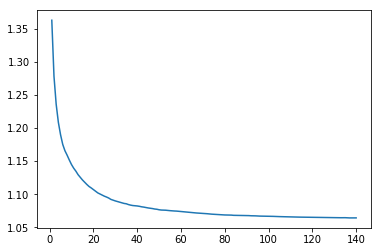

In [16]:
plt.plot(K,error2)

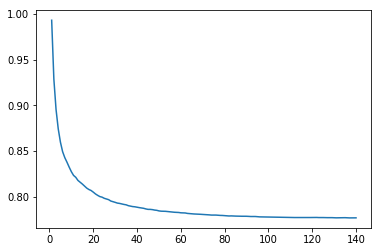

In [17]:
plt.plot(K,mae2)

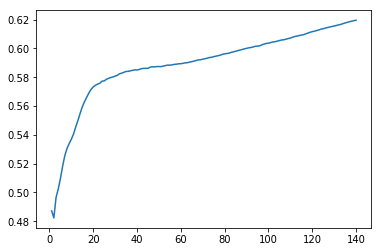

In [18]:
plt.plot(K,gim2)

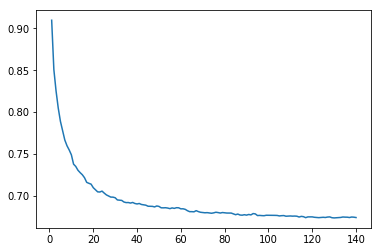

In [19]:
plt.plot(K,gpim2)